# Connect to file

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
male_data= pd.read_csv('/content/drive/My Drive/Internship projects/nhanes_adult_male_bmx_2020.csv')
female_data= pd.read_csv('/content/drive/My Drive/Internship projects/nhanes_adult_female_bmx_2020.csv')

In [144]:
male_data.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


In [145]:
female_data.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


In [146]:
# prompt: rename the all columns

# Create a dictionary to map old column names to new column names
new_column_names = {
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXLEG': 'upper_Leg',
    'BMXARML': 'upper_arm',
    'BMXWAIST': 'waist_circumference',
    'BMXARMC': 'arm_circumference',
    'BMXHIP': 'hip_circumference'
}

# Rename columns in male_data
male_data.rename(columns=new_column_names, inplace=True)

# Rename columns in female_data
female_data.rename(columns=new_column_names, inplace=True)


In [147]:
male_data.describe()

,weight,height,upper_arm,upper_Leg,arm_circumference,hip_circumference,waist_circumference
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000
mean,88.364543,173.827028,39.215045,41.341240,34.334183,104.495099,101.789414
std,21.421561,7.662410,2.435982,3.214881,4.785677,12.211841,16.540779
min,36.800000,144.600000,29.600000,27.500000,19.000000,77.000000,62.300000
25%,73.300000,168.600000,37.500000,39.200000,31.000000,96.000000,90.100000
50%,85.000000,173.800000,39.100000,41.200000,34.000000,102.700000,100.600000
75%,99.800000,178.900000,40.900000,43.500000,37.300000,110.600000,111.900000
max,204.600000,199.600000,49.900000,53.000000,53.600000,174.900000,170.800000


In [148]:
female_data.describe()

,weight,height,upper_arm,upper_Leg,arm_circumference,hip_circumference,waist_circumference
count,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000
mean,77.403791,160.136792,36.031035,37.157972,32.710329,109.178370,98.488107
std,21.545061,7.062859,2.346150,3.214914,5.609625,15.624294,17.399588
min,32.600000,131.100000,28.500000,25.000000,17.900000,74.000000,56.400000
25%,61.600000,155.300000,34.400000,35.000000,28.700000,97.700000,86.000000
50%,73.600000,160.100000,36.000000,37.100000,32.100000,106.700000,97.100000
75%,88.700000,164.800000,37.500000,39.300000,36.100000,117.900000,109.400000
max,180.900000,189.300000,46.700000,49.100000,57.200000,179.000000,178.000000


# Compare weight using histogram

In [149]:
male_weights = male_data['weight']
female_weights = female_data['weight']

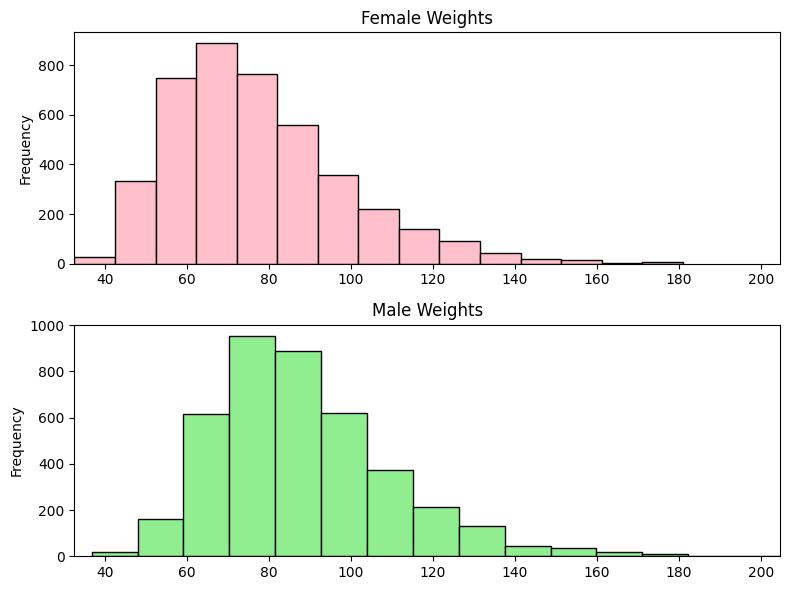

In [150]:
# Create subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # 2 rows, 1 column

# Plot the histogram for female weights
ax1.hist(female_weights, bins=15, color='pink', edgecolor='black')
ax1.set_title('Female Weights')
ax1.set_ylabel('Frequency')

# Plot the histogram for male weights
ax2.hist(male_weights, bins=15, color='lightgreen', edgecolor='black')
ax2.set_title('Male Weights')
ax2.set_ylabel('Frequency')

# Determine x-axis limits
x_min = min(female_weights.min(), male_weights.min())
x_max = max(female_weights.max(), male_weights.max())
ax1.set_xlim([x_min, x_max])
ax2.set_xlim([x_min, x_max])
plt.tight_layout()
plt.show()

The histograms show that while both male and female weight distributions have a similar shape, males tend to have a higher average weight compared to females, with the male weights being more spread out across a wider range. This suggests greater variability in male weights compared to female weights.

# Box Plot Comparison

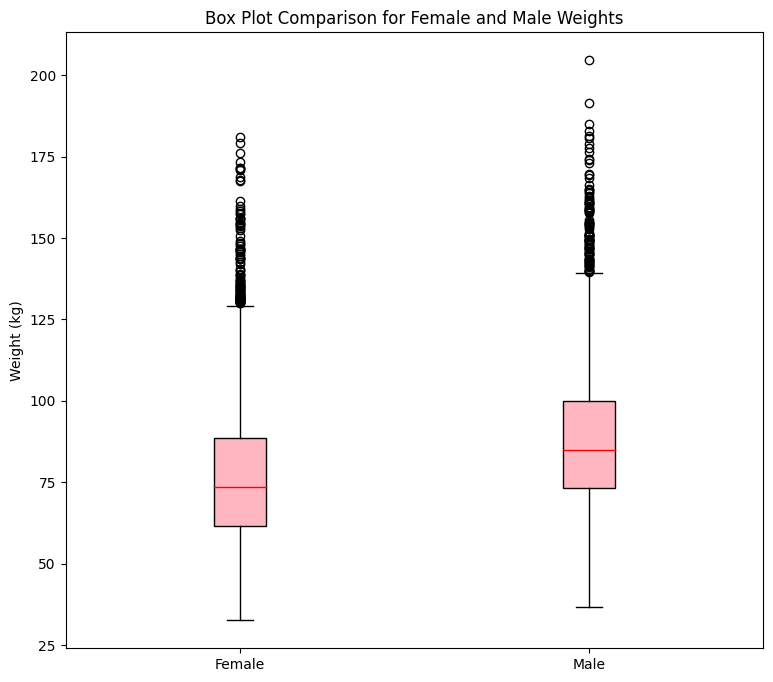

In [151]:
# Create the box plot
plt.figure(figsize=(9, 8))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True,boxprops=dict(facecolor='lightpink', color='black'),medianprops=dict(color='red'))

# Set title and labels
plt.title('Box Plot Comparison for Female and Male Weights')
plt.ylabel('Weight (kg)')

# Display the plot
plt.show()

The box plot reveals that males generally have higher and more variable weights compared to females, with a wider spread in male data, indicating more diversity in weight distribution.

# Claculate skewness and kurtosis

In [152]:
#Using for skewness and kurtosis ensures accurate and efficient calculations of distribution shape, which basic libraries don't provide directly.
import scipy.stats as stats

In [153]:
# Compute basic aggregates
aggregates = {
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Variance', 'IQR', 'Skewness', 'Kurtosis'],
    'Female Weights': [
        female_weights.mean(),
        female_weights.median(),
        female_weights.std(),
        female_weights.var(),
        female_weights.quantile(0.75) - female_weights.quantile(0.25),
        stats.skew(female_weights),
        stats.kurtosis(female_weights)
    ],
    'Male Weights': [
        male_weights.mean(),
        male_weights.median(),
        male_weights.std(),
        male_weights.var(),
        male_weights.quantile(0.75) - male_weights.quantile(0.25),
        stats.skew(male_weights),
        stats.kurtosis(male_weights)
    ]
}

# Display the results
df_aggregates = pd.DataFrame(aggregates)
print(df_aggregates)

            Statistic  Female Weights  Male Weights
0                Mean       77.403791     88.364543
1              Median       73.600000     85.000000
2  Standard Deviation       21.545061     21.421561
3            Variance      464.189635    458.883294
4                 IQR       27.100000     26.500000
5            Skewness        1.033361      0.984281
6            Kurtosis        1.400968      1.474288


**Explanation:**

**Mean and Median:** Male weights have a higher mean and median, indicating that males generally weigh more than females.

**Standard Deviation :** The standard deviations are quite similar, indicating that both groups have comparable variability or spread in weights around the mean.

**Variance:** Variance, which is the square of the standard deviation, also shows similar dispersion for both genders, confirming that the spread of weights is alike in both groups.

**IQR (Interquartile Range):** The IQR values, representing the spread of the middle 50% of the data, are close in value, meaning that both groups have a similar range in weight for the central half of the data.

**Skewness:** Both distributions are positively skewed, meaning that there are a few individuals with significantly higher weights. The skewness values being close to 1 indicate that both distributions have a moderate right skew.

**Kurtosis:** The kurtosis values for both groups suggest that the distributions have slightly heavier tails compared to a normal distribution, implying more outliers than expected in a normal distribution.

**Conclusion:**

Males, on average, weigh more than females in this dataset, but both groups have similar variability in weights. Both distributions are moderately right-skewed, indicating some individuals with higher-than-average weights. The slightly elevated kurtosis for both groups suggests a few extreme values (outliers) in each distribution. Overall, the weight distributions for males and females are comparable in terms of spread, but males generally weigh more.

# Claculate Body Mass Indices(BMI)

In [154]:
female_heights = female_data['height']  # Height in centimeters

# Convert height from cm to meters
female_heights_m = female_heights / 100

# Calculate BMI
female_bmi = female_weights / (female_heights_m ** 2)

# Add BMI as a new column to the female dataset
female_data['BMI'] = female_bmi #Body Mass Indices(BMI)

# Display the updated dataset
print(female_data.head())

# Optionally, save the updated dataset to a new file
female_data.to_csv('female_data_with_bmi.csv', index=False)

   weight  height  upper_arm  upper_Leg  arm_circumference  hip_circumference  \
0    97.1   160.2       34.7       40.8               35.8              126.1   
1    91.1   152.7       33.5       33.0               38.5              125.5   
2    73.0   161.2       37.4       38.0               31.8              106.2   
3    61.7   157.4       38.0       34.7               29.0              101.0   
4    55.4   154.6       34.6       34.0               28.3               92.5   

   waist_circumference        BMI  
0                117.9  37.835041  
1                103.1  39.069720  
2                 92.0  28.092655  
3                 90.5  24.904378  
4                 73.2  23.178791  


**BMI** is the body mass indices for females

# Calculate Female Z-score

In [155]:
from scipy.stats import zscore

# Apply the z-score standardization to all columns
zfemale = female_data.apply(zscore)

# Display the standardized dataset
print(zfemale.head())

# Optionally, save the z-scored dataset to a new file
zfemale.to_csv('zfemale_standardized.csv', index=False)

     weight    height  upper_arm  upper_Leg  arm_circumference  \
0  0.914295  0.008950  -0.567395   1.132988           0.550845   
1  0.635776 -1.053068  -1.078931  -1.293492           1.032218   
2 -0.204423  0.150553   0.583563   0.261944          -0.162299   
3 -0.728968 -0.387537   0.839332  -0.764643          -0.661500   
4 -1.021413 -0.784024  -0.610023  -0.982404          -0.786301   

   hip_circumference  waist_circumference       BMI  
0           1.083162             1.115785  0.996968  
1           1.044755             0.265089  1.156175  
2          -0.190647            -0.372933 -0.259275  
3          -0.523501            -0.459152 -0.670391  
4          -1.067590            -1.453546 -0.892899  


# Compute Pearson’s and Spearman’s correlation coefficients

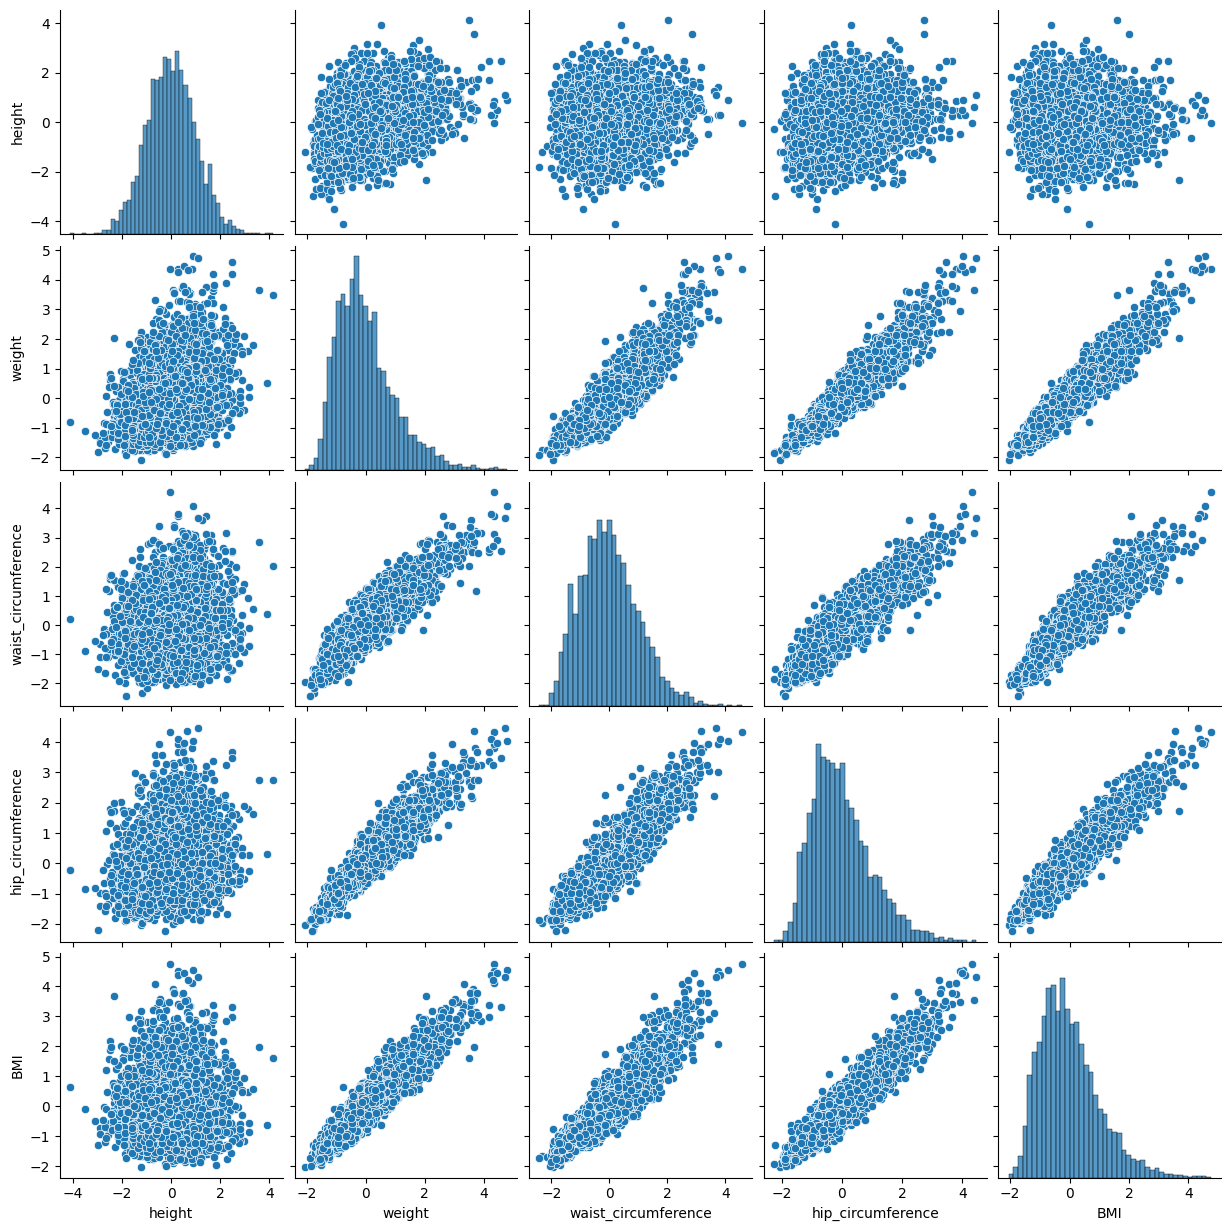

Pearson's Correlation Coefficients:
                       height    weight  waist_circumference  \
height               1.000000  0.345496             0.126547   
weight               0.345496  1.000000             0.904550   
waist_circumference  0.126547  0.904550             1.000000   
hip_circumference    0.202895  0.946553             0.897407   
BMI                  0.033077  0.945900             0.921198   

                     hip_circumference       BMI  
height                        0.202895  0.033077  
weight                        0.946553  0.945900  
waist_circumference           0.897407  0.921198  
hip_circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  

Spearman's Correlation Coefficients:
                       height    weight  waist_circumference  \
height               1.000000  0.338860             0.108587   
weight               0.338860  1.000000             0.900169   
waist_circumference  0.108587  0.900169    

In [140]:
from scipy.stats import pearsonr, spearmanr

# Assuming you have the z-scores dataset `zfemale`
zfemale = pd.read_csv('zfemale_standardized.csv')

# Select relevant columns for height, weight, waist, hip, and BMI
columns_of_interest = ['height', 'weight', 'waist_circumference', 'hip_circumference', 'BMI']
zfemale_subset = zfemale[columns_of_interest]

# Create a scatterplot matrix (pairplot) for the selected columns
sns.pairplot(zfemale_subset)
plt.show()

# Compute Pearson's and Spearman's correlation coefficients
pearson_corr = zfemale_subset.corr(method='pearson')
spearman_corr = zfemale_subset.corr(method='spearman')

# Display the correlation matrices
print("Pearson's Correlation Coefficients:")
print(pearson_corr)

print("\nSpearman's Correlation Coefficients:")
print(spearman_corr)

# Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio

In [157]:
# Compute waist-to-height ratio for both datasets
male_data['Waist-to-Height Ratio'] = male_data['waist_circumference'] / male_data['height']
female_data['Waist-to-Height Ratio'] = female_data['waist_circumference'] / female_data['height']

# Compute waist-to-hip ratio for both datasets
male_data['Waist-to-Hip Ratio'] = male_data['waist_circumference'] / male_data['hip_circumference']
female_data['Waist-to-Hip Ratio'] = female_data['waist_circumference'] / female_data['hip_circumference']

# Display the updated datasets
print("Male Data with New Columns:\n", male_data.head())
print("Female Data with New Columns:\n", female_data.head())

# Optionally, save the updated datasets to new files
male_data.to_csv('male_data_with_ratios.csv', index=False)
female_data.to_csv('female_data_with_ratios.csv', index=False)

Male Data with New Columns:
    weight  height  upper_arm  upper_Leg  arm_circumference  hip_circumference  \
0    98.8   182.3       42.0       40.1               38.2              108.2   
1    74.3   184.2       41.1       41.0               30.2               94.5   
2   103.7   185.3       47.0       44.0               32.0              107.8   
3    86.0   167.8       39.5       38.4               29.0              106.4   
4    99.4   181.6       40.4       39.9               36.0              120.2   

   waist_circumference  Waist-to-Height Ratio  Waist-to-Hip Ratio  
0                120.4               0.660450            1.112754  
1                 86.8               0.471227            0.918519  
2                109.6               0.591473            1.016698  
3                108.3               0.645411            1.017857  
4                107.0               0.589207            0.890183  
Female Data with New Columns:
    weight  height  upper_arm  upper_Leg  arm_

**Waist-to-Height Ratio (WHtR):**

**Males:** Ranges from 0.47 to 0.66. Higher values indicate a larger waist relative to height, suggesting increased potential health risks.

**Females:** Ranges from 0.47 to 0.74. Higher values similarly suggest a greater proportion of abdominal fat relative to height, which may also be linked to higher health risks.
**Waist-to-Hip Ratio (WHR):**

**Males:** Ranges from 0.89 to 1.11. Higher values suggest a larger waist circumference relative to hip circumference, which could be associated with increased cardiovascular risk.

**Females:** Ranges from 0.79 to 0.93. Higher values indicate a larger waist relative to hip circumference, which might be related to higher health risks.

# Box-and-Whisker Plot for Waist-to-Height and Waist-to-Hip Ratios

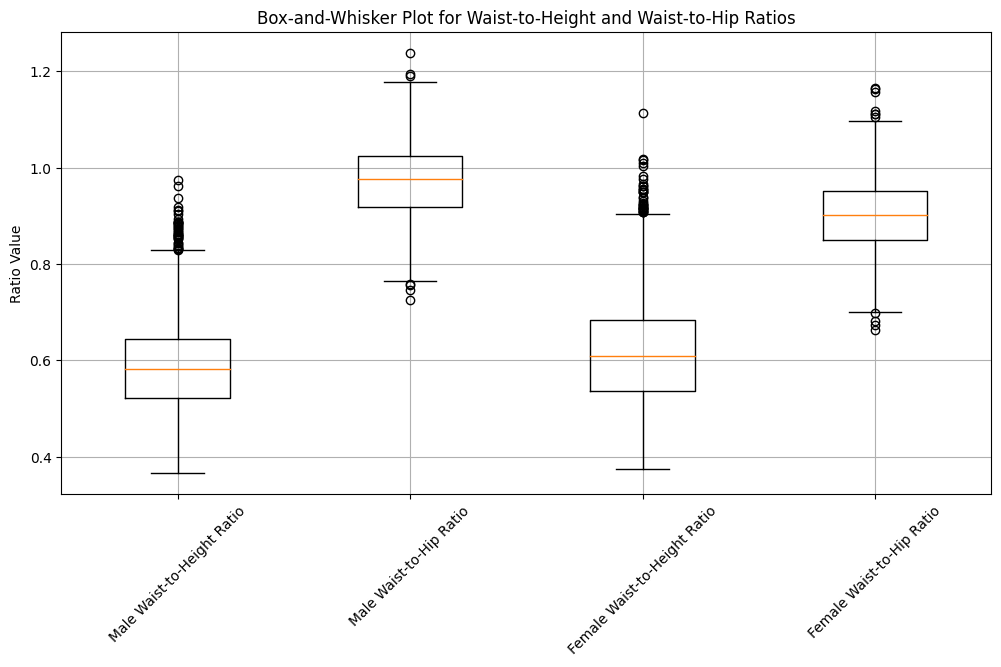

In [160]:
# Prepare data for plotting
data_to_plot = {
    'Male Waist-to-Height Ratio': male_data['Waist-to-Height Ratio'],
    'Male Waist-to-Hip Ratio': male_data['Waist-to-Hip Ratio'],
    'Female Waist-to-Height Ratio': female_data['Waist-to-Height Ratio'],
    'Female Waist-to-Hip Ratio': female_data['Waist-to-Hip Ratio']
}

# Create the box-and-whisker plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot.values(), labels=data_to_plot.keys())
plt.title('Box-and-Whisker Plot for Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio Value')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

**Waist-to-Height Ratio (WHtR):**

**Males:** The 50th percentile (median) of the waist-to-height ratio is relatively low compared to the female participants, indicating that, on average, males have a smaller waist circumference relative to their height. The interquartile range (IQR) is narrower, suggesting less variability in this ratio among males.

**Females:** The 50th percentile of the waist-to-height ratio is higher, reflecting a larger waist circumference relative to height. The broader IQR and the presence of outliers indicate greater variability and a wider range of waist-to-height ratios among females.

**Waist-to-Hip Ratio (WHR):**

**Males:** The 50th percentile (median) of the waist-to-hip ratio is notably higher compared to the waist-to-height ratio. This indicates that males, on average, have a higher waist circumference relative to their hip circumference. The IQR for WHR is moderate, with fewer extreme outliers.

**Females:** The waist-to-hip ratio shows a similar trend, with the median being higher compared to the waist-to-height ratio, consistent with greater relative waist circumference. The plot displays a wider range of values and more outliers, suggesting increased variability among females.

# **Body Mass Index (BMI) and  Waist-to-Height Ratio (WHtR)**

**Body Mass Index (BMI)**
**Advantages:**

**Simplicity:** Easy to calculate using weight and height, making it accessible for large-scale assessments.

**Standardization:** Widely used and recognized, providing a common metric for comparing body weight across different populations.

**Screening Tool:** Useful for initial screening of potential weight-related health issues.

**Disadvantages:**

**Doesn't Differentiate Fat from Muscle:** BMI doesn't account for body composition; a person with high muscle mass might be classified as overweight or obese.

**No Measurement of Fat Distribution:** BMI doesn't provide information on how fat is distributed throughout the body, which can be important for health risks.

**Not Suitable for All Populations:** May not be accurate for athletes, elderly, or those with different body types.

**Waist-to-Height Ratio (WHtR)**
**Advantages:**

**Better Indicator of Fat Distribution:** More accurately reflects abdominal fat, which is linked to higher health risks.

**Simplicity:** Easy to calculate using waist circumference and height, making it straightforward to use.

**Predictive of Health Risks:** Studies suggest it may be a better predictor of cardiovascular risk compared to BMI.

**Disadvantages:**

**Requires Accurate Measurement:** Waist circumference needs to be measured correctly for accurate results.

**Not Ideal for All Populations:** May not account for differences in body shape or age-related changes in fat distribution.

**Lack of Standardization:** Less universally standardized compared to BMI, which might limit its applicability across different settings.

# New Section

In [161]:
from sklearn.preprocessing import StandardScaler

# Standardize the body measurements
scaler = StandardScaler()
standardized_columns = ['height', 'weight', 'waist_circumference', 'hip_circumference', 'BMI']
z_female = female_data.copy()
z_female[standardized_columns] = scaler.fit_transform(female_data[standardized_columns])

# Sort by BMI and get the indices of the 5 lowest and 5 highest BMI values
sorted_indices = np.argsort(z_female['BMI'])
lowest_indices = sorted_indices[:5]
highest_indices = sorted_indices[-5:]

# Combine indices and extract the rows
selected_indices = np.concatenate((lowest_indices, highest_indices))
subset_z_female = z_female.iloc[selected_indices]

# Print the results
print("Standardized Measurements for 5 Persons with Lowest BMI and 5 Persons with Highest BMI:")
print(subset_z_female[standardized_columns])

Standardized Measurements for 5 Persons with Lowest BMI and 5 Persons with Highest BMI:
        height    weight  waist_circumference  hip_circumference       BMI
262  -1.222991 -2.079785            -1.942121          -2.040550 -2.050240
3478 -0.189293 -1.880180            -2.057080          -1.854919 -1.994880
2126  1.807302 -1.536673            -1.706456          -1.675690 -1.970884
2753 -0.260094 -1.843044            -1.855902          -2.251784 -1.941776
1209  0.886886 -1.610945            -1.712204          -1.829315 -1.893196
2268  0.292155  4.247240             3.817318           4.104456  4.396492
3022  0.504559  4.456130             2.903395           3.982836  4.462011
1472  0.277995  4.349364             3.754091           3.918826  4.514669
1104  0.886886  4.804279             4.081723           4.021242  4.542709
1096 -0.033530  4.363290             4.570299           4.315691  4.762433


**Lowest BMI:**

Participants with the lowest BMI have significantly lower standardized values for weight and waist circumference, indicating they are lighter and have smaller waist sizes relative to the rest of the dataset. Their BMI values are much lower compared to the overall average.

**Highest BMI:**

Participants with the highest BMI exhibit higher standardized values for weight and waist circumference, reflecting greater body mass and abdominal fat. Their BMI values are much higher than the average, and their measurements for waist circumference and hip circumference are notably elevated.